<a href="https://colab.research.google.com/github/prosperjohn9/OutlierAnalysis/blob/main/OutlierAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

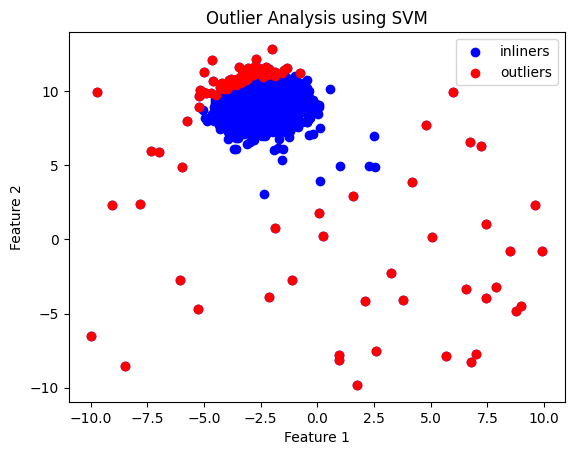

In [ ]:
# Import the necessary libraries
import numpy as np # for numerical operations
import pandas as pd # for data manipulation
import matplotlib.pyplot as plt # for data visualization
from sklearn import svm # the support vector machine model used
from sklearn.datasets import make_blobs # for generating synthetic datasets
# for feature scaling/preprocessing
from sklearn.preprocessing import MinMaxScaler

# Generate a synthetic Dataset using make_blobs
X, _ = make_blobs(n_samples=1000, centers=1, random_state=42)
'''
The above is a dataset with 1000 samples and 1 cluster using the _ variable
to ignore labels

'''
outliers = np.random.uniform(low=-10, high=10, size=(50, 2))
'''
Random outliers generated with values ranging from -10 to 10

'''
X = np.concatenate([X, outliers])

# Preprocess the data
scalar = MinMaxScaler()
X_normalized = scalar.fit_transform(X)

# Train the Support Vector Machine
model = svm.OneClassSVM(nu=0.1, kernel="rbf",gamma=0.1)
'''
The nu parameter controls the fraction of outliers expected in the dataset
The gamma parameter controls the influence of each training example

'''
model.fit(X_normalized)

# Predict outliers
predictions = model.predict(X_normalized) # inliner(+1), outlier(-1)

# Analyze the results
outliers = X[predictions == -1]

# Visualize the data points and outliers
plt.scatter(X[:, 0], X[:, 1], color="blue", label="inliners")
plt.scatter(outliers[:, 0], outliers[:, 1], color="red", label="outliers")

# Set plot labels and title
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Outlier Analysis using SVM")

# Add a legend
plt.legend()

# Show the plot
plt.show()